In [1]:
# Uncomment the next to lines if you want to run the example notebook from the package directory without 
# installing flagcomplex.
import sys
sys.path.insert(0, '../')

from flagcomplex import FlagComplex, FlagTesselator
from flagcomplex.DrawingUtility import drawcirc
from flagcomplex.ProjGeometryUtility import transform_four_points

import numpy as np
import drawSvg as draw

ModuleNotFoundError: No module named 'flagcompley'

# Eruption flow on the tesselation of a four-tuple of flags
Most of what we do here is analogous to the `tutorial-flag-4tuple-eruption-flow.ipynb`. However, in this tutorial, we will also tesselate the complex, and look at the transformation of the tesselation.
## Setup

In [21]:
fcomplex = FlagComplex()

other_points = [np.array([1, 1, 1]), np.array([1, -1, 1]), np.array([-1, -1, 1]), np.array([-1, 1, 1])]
p0 = np.array([0, 1, 1])
q0 = other_points[0]

p1 = np.array([1, 0, 1])
q1 = other_points[1]

p2 = np.array([0, -1, 1])
q2 = other_points[2]

p3 = np.array([-1, 0, 1])
q3 = other_points[3]



fcomplex.add_flag(p0,q0)
fcomplex.add_flag(p1,q1)
fcomplex.add_flag(p2,q2)
fcomplex.add_flag(p3,q3)

fcomplex.set_projection_plane(np.array([0,0,1]))

import copy
fcomplex1 = copy.deepcopy(fcomplex)
ftesselator1 = FlagTesselator(fcomplex1, steps = 5)

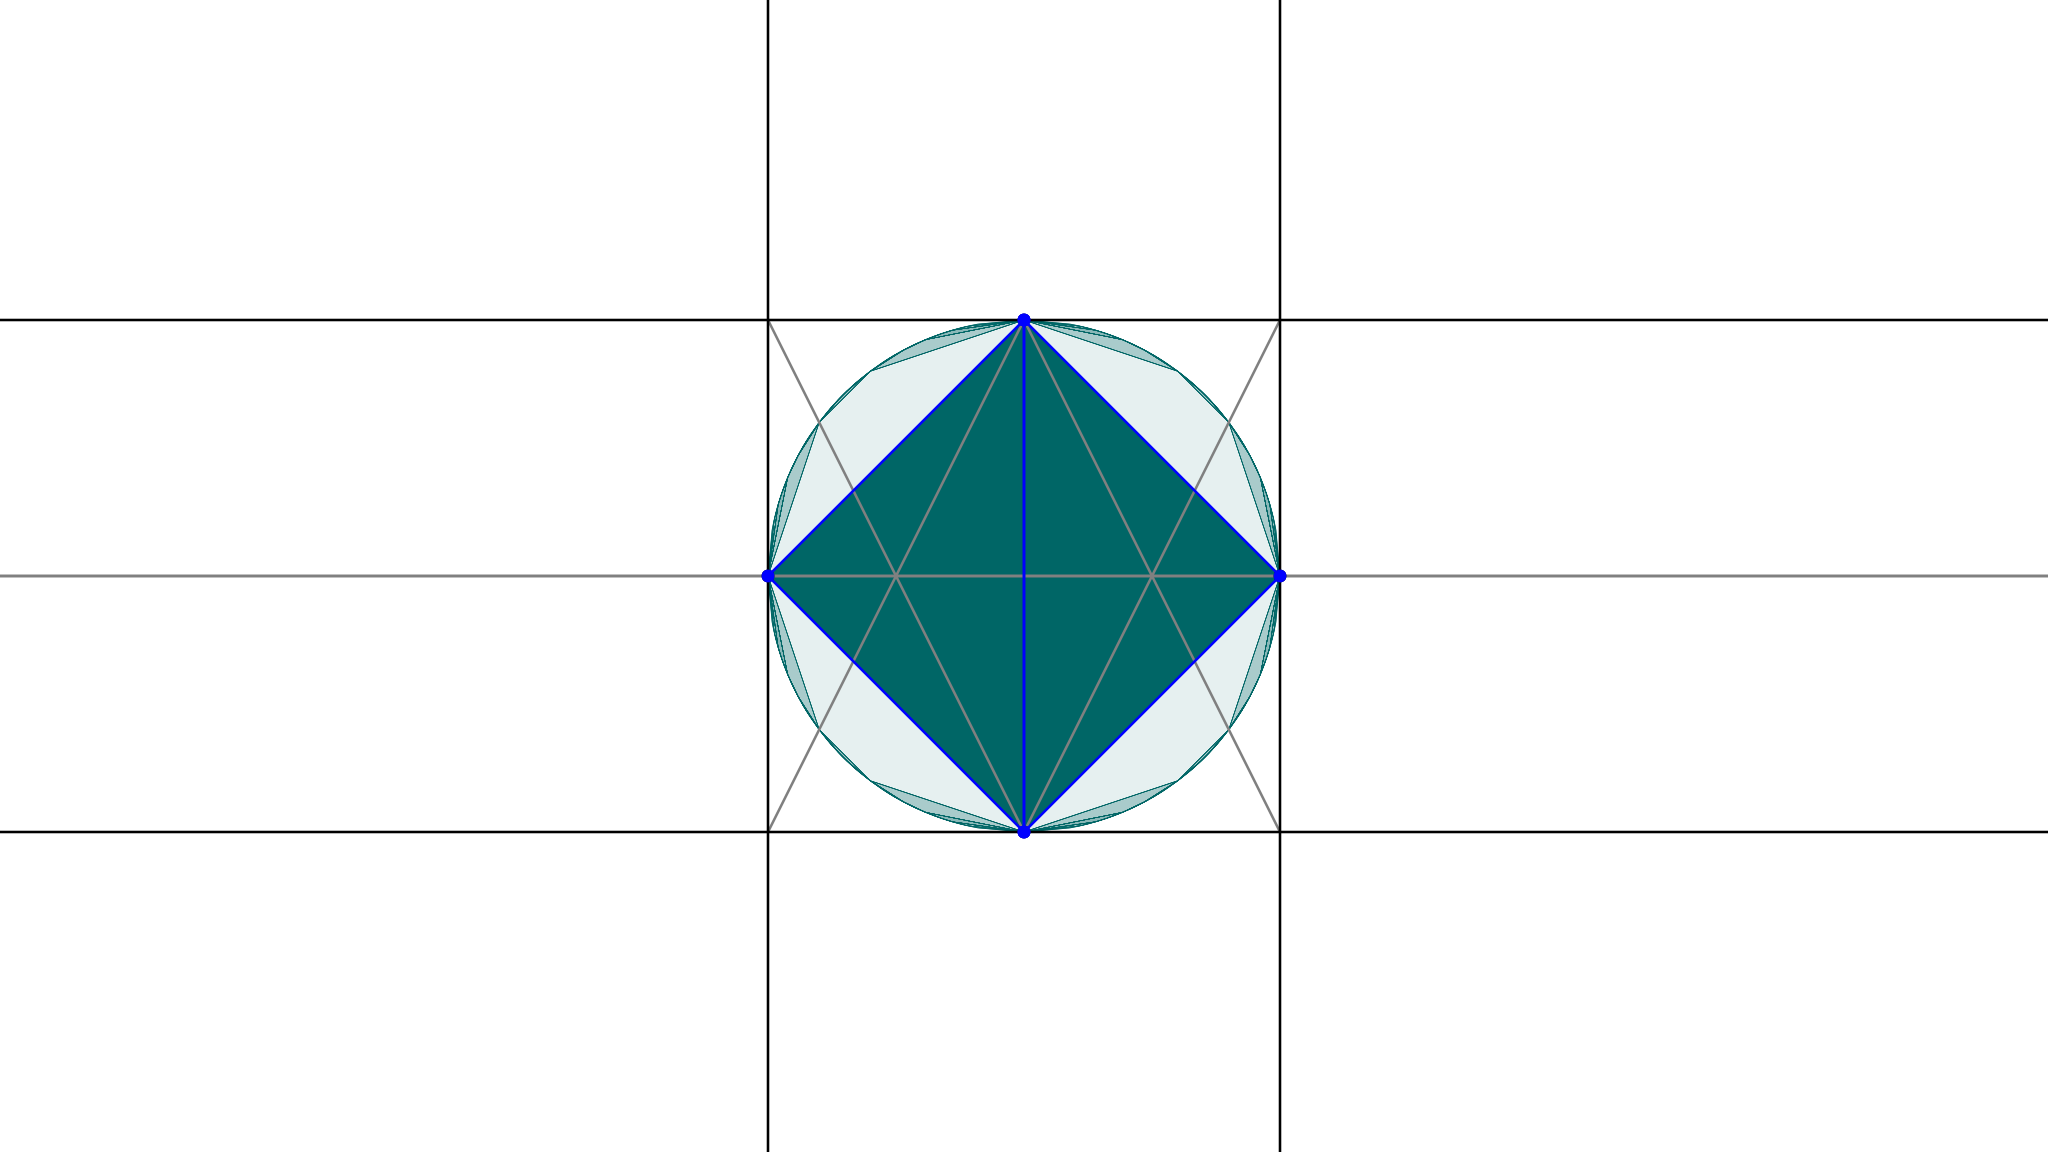

In [22]:
import copy

d = fcomplex.initialize_canvas()

fcomplex.create_triangulation()
fcomplex.draw_complex()

ftesselator = FlagTesselator(fcomplex, steps = 5)
d1 = copy.deepcopy(d)
ftesselator.print_image(old = d1, with_tiles = True)
fcomplex.visualize(d1,with_helper_lines=True, with_inner_triangles = False, with_label= False)
d1.savePng("ef_4_tesselation.png")
d1

## Parameters (t, t)

In [24]:
import copy

steps=100
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    print(r)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = True, fill_convex = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessplus_" + str(r) + ".png")

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [25]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessplus_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_plusplus.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

[MoviePy] >>>> Building video eruption_flow_4tuple_tess_plusplus.mp4
[MoviePy] Writing video eruption_flow_4tuple_tess_plusplus.mp4


100%|██████████| 14/14 [00:00<00:00, 17.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: eruption_flow_4tuple_tess_plusplus.mp4 



100%|██████████| 14/14 [00:00<00:00, 15.33it/s]


## Parameters (-t, t)
### Normal visualization

In [ ]:
import copy

fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselator(fcomplex, steps=4)

steps=100
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = True, fill_convex = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_" + str(r) + ".png")

In [ ]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

### Visualization without tiles

In [ ]:
import copy

fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselator(fcomplex, steps=4)

steps=180
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    print(r)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    fcomplex.projective_transformation = transform_four_points(fcomplex.qs, [other_points[i-1] for i in range(4)])
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = False, fill_convex = True, with_initial = False)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_notiles_" + str(r) + ".png")

In [ ]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_notiles_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus_notiles.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

### Visualization without transformation to initial situation

In [ ]:
import copy

fcomplex = copy.deepcopy(fcomplex1)
ftesselator = FlagTesselator(fcomplex, steps=4)

steps=100
step_width = 0.04

triangle0 = [1, 2, 0]
triangle1 = [2, 3, 0]

fcomplex.set_subdivision([2, 3, 0], {2: [0], 3: [2, 1], 0: [3]})
fcomplex.set_subdivision([1, 2, 0], {1: [0, 3], 2: [1], 0: [2]})

style = "Q"

for r in range(1, steps):
    print(r)
    fcomplex.erupt_complex_along_triangle(t=  step_width, triangle=triangle1, transformation_style=style)
    fcomplex.erupt_complex_along_triangle(t= -step_width, triangle=triangle0, transformation_style=style)
    
    d1 = copy.deepcopy(d)
    
    ftesselator.print_image(old = d1, with_tiles = False, fill_convex = True, with_initial = True)
    fcomplex.visualize(d1,with_helper_lines=False, with_inner_triangles = False, with_label=False)

    d1.savePng("./temp/ef4tessminus_notransform_" + str(r) + ".png")

In [ ]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4tessminus_notransform_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
animation.write_videofile("eruption_flow_4tuple_tess_minusplus_notransform.mp4")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)